<a href="https://colab.research.google.com/github/katarinagresova/M7DataSP_2020/blob/main/assignment_02/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data TODOs:
- ~~choose dataset~~
- ~~set way of loading data to this notebook~~  *Erik*

# Preprocessing TODOs:
- ~~check missing values~~ (there are none)
- ~~do one-hot encoding~~ (binned quality into bad and good)
- (optional: more preprocessing (would like to do outlier detection, if there will be time) )
- ~~split label~~
- ~~split train and test~~

# Model training TODOs:
- ~~create normalizer~~
- ~~define neural network~~
- ~~train neural network~~
- ~~plot the evolution of loss and/or accuracy as a number of epoch increases~~

#Evaluating TODOs
-~~ evaluate model on test data~~

# More layers TODOs

- create a neural network with more layers
- compare the two based on some measure
-plot the loss function instead of accuracy(accuracy is not a good measure when the classes are unballanced)
- maybe think of other measure such as precision, or f score

## Eriks personal TODOs
- ask how to use pipeline std scaler in neural networks
-ask what how to proceed with unballanced classes
- ask input_shape ? 
- ask adam(0.001)

# Data import

---



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing



In [16]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Note that there is no cathegorical variable so there is no need to onehotencode.

In [18]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#Data preprocessing

As we can see, all our data is numerical. Let's check, if there are some missing values.

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We are in luck my friend, there are no missing values. Let's change label - `quality` - in only two categories 'bad' and 'good' it makes it easier for classification. We split the label with median of quality (6) being border withween class labels

In [6]:
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6, 8], labels = ['bad', 'good'])

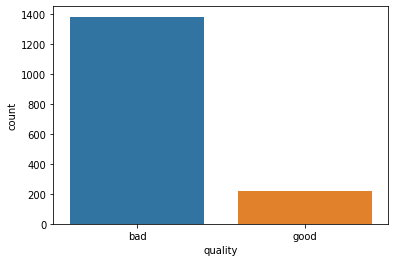

In [25]:
sns.countplot(x='quality', data = wine)

Unbalanced class?

And now some data splitting. First split data into train and test and then separate label column from data.

In [115]:
train_dataset = wine.sample(frac=0.8, random_state=42)
test_dataset = wine.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

label = 'quality'
train_labels = train_features.pop(label)== 'good'
test_labels = test_features.pop(label)== 'good'


803     False
124     False
350     False
682     False
1326    False
        ...  
16       True
1072    False
1574    False
546     False
658     False
Name: quality, Length: 1279, dtype: bool

Print some shapes to see if we did good.

In [116]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((1279, 11), (320, 11), (1279,), (320,))

In order to use Neural network algorithm, we need to standardize the data to zero mean and unit variance.


In [117]:
normalizer = preprocessing.Normalization()  #treba tam aj to imput shape?
normalizer.adapt(np.array(train_features))

In [109]:
'''normalizer = Pipeline(
    [('std_scaler', StandardScaler())]
)
x_train = normalizer.fit_transform(train_features)
x_test = normalizer.fit_transform(test_features)
'''
# toto ma zaujima, preco tento normalizer nefunguje
# a ako to upravit aby to v sequential funogvalo

"normalizer = Pipeline(\n    [('std_scaler', StandardScaler())]\n)\nx_train = normalizer.fit_transform(train_features)\nx_test = normalizer.fit_transform(test_features)\n"

#Neural Network
## One neuron model

In [121]:
first_model = tf.keras.Sequential([
        normalizer,
        layers.Dense(units=1)
])

first_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 12        
Total params: 35
Trainable params: 12
Non-trainable params: 23
_________________________________________________________________


In [125]:
first_model.compile(loss='binary_crossentropy',
                    optimizer =tf.keras.optimizers.Adam(0.001), metrics =['accuracy'] )
# do optimizer staci len 'adam' ?

In [134]:
%%time
history = first_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 5.08 s, sys: 371 ms, total: 5.45 s
Wall time: 4.29 s


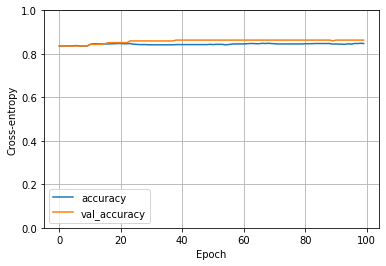

In [135]:
def plot_loss(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Cross-entropy')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [137]:

# evaluation on test data
test_evaluation = {}
test_evaluation['first_model'] = first_model.evaluate(
    test_features,
    test_labels, verbose=1)
test_evaluation

10/10 [==============================] - 0s 1ms/step - loss: 0.6161 - accuracy: 0.8719


{'first_model': [0.6160842180252075, 0.871874988079071]}